In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("alzheimers_disease_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'alzheimers_disease_data.csv'

In [ ]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


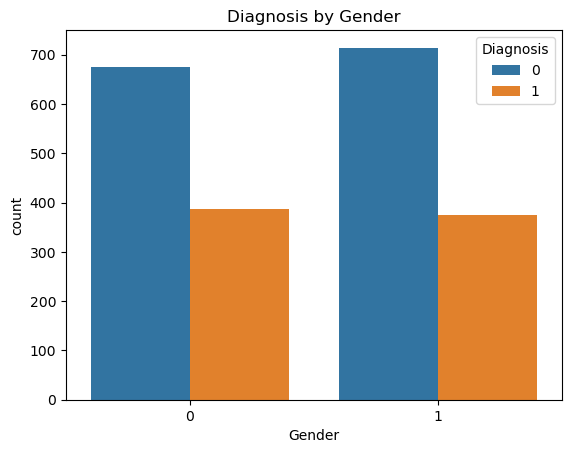

In [ ]:
sns.countplot(x='Gender', hue='Diagnosis', data=df)
plt.title("Diagnosis by Gender")
plt.show()


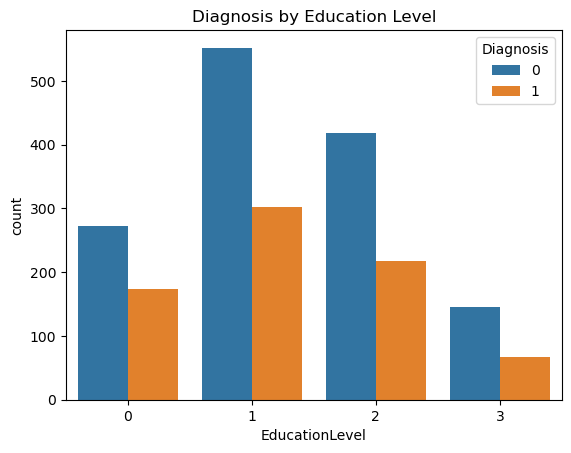

In [ ]:
sns.countplot(x='EducationLevel', hue='Diagnosis', data=df)
plt.title("Diagnosis by Education Level")
plt.show()


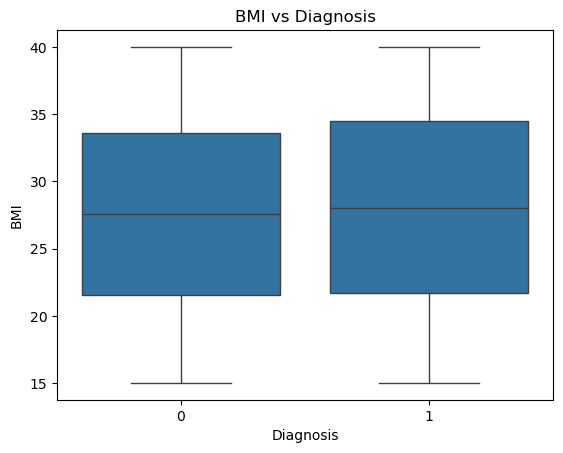

In [ ]:
sns.boxplot(x='Diagnosis', y='BMI', data=df)
plt.title("BMI vs Diagnosis")
plt.show()


In [ ]:
df["Diagnosis"].value_counts(normalize=True) #unbalanced data

Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
df.drop(["PatientID","DoctorInCharge"],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [ ]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
x=df.drop(["Diagnosis"],axis=1)
y=df["Diagnosis"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.2)

In [ ]:
numeric_cols = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 
    'MMSE', 'FunctionalAssessment', 'ADL'
]
skew_values = df[numeric_cols].skew()
print(skew_values)

Age                         0.045964
BMI                        -0.026715
AlcoholConsumption          0.018415
PhysicalActivity            0.044973
DietQuality                -0.012058
SleepQuality               -0.069630
SystolicBP                  0.009971
DiastolicBP                -0.054470
CholesterolTotal           -0.018674
CholesterolLDL              0.036233
CholesterolHDL              0.042206
CholesterolTriglycerides   -0.032923
MMSE                        0.032382
FunctionalAssessment       -0.034576
ADL                        -0.030436
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler
import pickle

numeric_cols = ['Age','BMI','AlcoholConsumption','PhysicalActivity','DietQuality',
                'SleepQuality','SystolicBP','DiastolicBP','CholesterolTotal',
                'CholesterolLDL','CholesterolHDL','CholesterolTriglycerides',
                'MMSE','FunctionalAssessment','ADL']

ss = StandardScaler()
df[numeric_cols] = ss.fit_transform(df[numeric_cols])

# حفظ الـ scaler مرة واحدة
pickle.dump(ss, open("scaling_numeric_cols.pkl", "wb"))


In [ ]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,0,0,2,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,...,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,1.567757,0,0,0,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,...,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,-0.212368,0,3,1,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,...,0.281813,0,0,0.724491,0,1,0,1,0,0
3,-0.101111,1,0,1,0.851625,1,0.376930,1.227995,0.839804,0.760833,...,1.343346,0,1,0.508044,0,0,0,0,0,0
4,1.567757,0,0,0,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,...,0.333665,0,0,-1.684679,0,0,1,1,0,0


In [ ]:
# from sklearn.feature_selection import SelectKBest,f_classif,f_regression,chi2,f_oneway
# kbest=SelectKBest(score_func=f_classif,k=10)
# x_train_select=kbest.fit_transform(x_train,y_train)
# x_train_select.shape
# kbest.get_feature_names_out()

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.experimental import enable_hist_gradient_boosting #for Histgrad
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.ensemble import  StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import  accuracy_score,precision_score,recall_score,f1_score,balanced_accuracy_score#confusion_matrix,classification_report,RocCurveDisplay,roc_auc_score

In [ ]:
models={
    "lg":LogisticRegression(),
    "naive":GaussianNB(),
    "KNN":KNeighborsClassifier(),
    # "SVM":SVC(),
    "DTree":DecisionTreeClassifier(),
    "Random forest":RandomForestClassifier(),
    "Extra":ExtraTreesClassifier(),
    "bagging":BaggingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Gboost":GradientBoostingClassifier(),
    "HGboost":HistGradientBoostingClassifier(),
    "stacking":StackingClassifier(
            estimators=[
            ('lr',LogisticRegression()),
            ('rf', RandomForestClassifier(random_state=42))
        ],
        final_estimator=LogisticRegression()),
    "Xgboosing":XGBClassifier(),
    "Catboosing":CatBoostClassifier(),
    "LGBM":LGBMClassifier()

}

metrics={
    "acc":accuracy_score,
    "precision":precision_score,
    "recall":recall_score,
    "balance_acc":balanced_accuracy_score,
    "f1_score":f1_score
    
}


In [ ]:
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)

    row = {"model_name": model_name}

    for metric_name, metric in metrics.items():
        row[f"{metric_name}_test"] = metric(y_test, y_pred_test)

    results.append(row)

results_df = pd.DataFrame(results)
results_df

In [ ]:
rforest=RandomForestClassifier(class_weight='balanced',random_state=100)
rforest.fit(x_train,y_train)
y_pred_test = rforest.predict(x_test)
f1 = f1_score(y_test, y_pred_test, average='binary')
print("F1 Score:", f1)


F1 Score: 0.875


In [ ]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [ ]:
pickle.dump(rforest,open("model.pkl",'wb'))

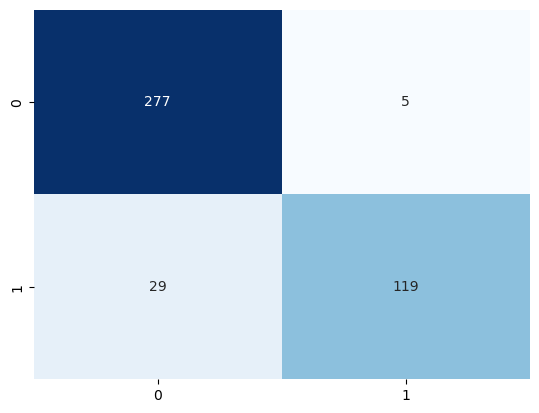

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report

cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_test,zero_division=0))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       282
           1       0.96      0.80      0.88       148

    accuracy                           0.92       430
   macro avg       0.93      0.89      0.91       430
weighted avg       0.92      0.92      0.92       430



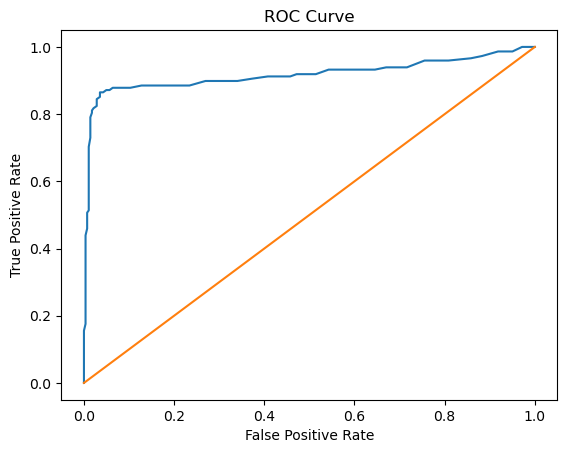

In [ ]:
y_pred_proba = rforest.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_curve,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1])  # خط عشوائي
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

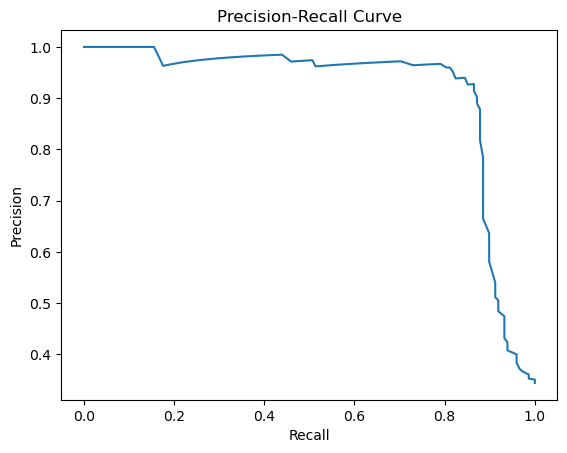

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()